In [1]:
%load_ext autoreload
%autoreload 2

from train import *
from models import *
from tools import *

from keras import optimizers
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from IPython.display import display

import numpy as np
import os

Using TensorFlow backend.


In [3]:
X_train, y_train = load_data()
X_val, y_val = load_data("val")
X_test, _ = load_data("test")

input_shape = X_train[0].shape
print("Input shape: " + str(input_shape))
print(X_train[0][0][0])

y_train = to_categorical(y_train, 200)
y_val = to_categorical(y_val, 200)

Loading train data

Finished loading train data

Loading val data

Finished loading val data

Loading test data

Finished loading test data

Input shape: (64, 64, 3)
[0.75294118 0.83137255 0.83529412]


In [4]:
labels = get_label_dict()
words = get_word_labels()

test_images = os.listdir("data/tiny-imagenet-200/test/images/")
assert len(X_test) == len(test_images)

Loading labels

Done

Loading words

Done



In [5]:
# Image preprocessing for the data
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True, 
                             rotation_range=90., 
                             brightness_range=[0.3, 0.7], 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             channel_shift_range=0.1, 
                             fill_mode="reflect", 
                             preprocessing_function=shuffle_channels)

datagen.fit(X_train)

testgen = ImageDataGenerator()

data = {"train": (X_train, y_train), 
        "val": (X_val, y_val)}

In [6]:
keras.backend.clear_session()

model = AlphaNet(input_shape, "v4")
model_prefix = "models/" + model.name + "/" + model.name
model_path = model_prefix + ".h5"

Model: "AlphaNet_v4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        

In [29]:
# Saves the best model based on monitor value between epochs
checkpoint = ModelCheckpoint(model_path, 
                             monitor="val_accuracy", 
                             verbose=1, 
                             save_best_only=True, 
                             period=1)

# Stops training early when no improvement for monitor value
early_stop = EarlyStopping(monitor="val_accuracy", 
                           min_delta=0, 
                           patience=10, 
                           verbose=1)

# Reduces learning rate when monitor value plateaus
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", 
                              factor=0.316, 
                              patience=5, 
                              verbose=1)

# Logs training data to CSV
restore = False # Whether or not we want to restore weights and continue training from a previous session
csv_log = CSVLogger(model_prefix + ".csv", separator=',', append=restore)

cb_list = [checkpoint, early_stop, reduce_lr, csv_log]

In [30]:
optim = optimizers.Adam(learning_rate=0.001)

history = train(model_path=model_path, 
                restore=restore, 
                epochs=300,
                model=model, 
                optim=optim,
                datagen=datagen, 
                testgen=testgen, 
                data=data, 
                cb_list=cb_list, 
                batch_size=32)

Epoch 1/300
 - 127s - loss: 5.4491 - accuracy: 0.0075 - top3_accuracy: 0.0223 - top5_accuracy: 0.0365 - val_loss: 5.6711 - val_accuracy: 0.0105 - val_top3_accuracy: 0.0265 - val_top5_accuracy: 0.0426

Epoch 00001: val_accuracy improved from -inf to 0.01050, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 2/300
 - 123s - loss: 5.1747 - accuracy: 0.0146 - top3_accuracy: 0.0405 - top5_accuracy: 0.0644 - val_loss: 5.0549 - val_accuracy: 0.0172 - val_top3_accuracy: 0.0457 - val_top5_accuracy: 0.0687

Epoch 00002: val_accuracy improved from 0.01050 to 0.01720, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 3/300
 - 125s - loss: 5.0566 - accuracy: 0.0241 - top3_accuracy: 0.0619 - top5_accuracy: 0.0936 - val_loss: 4.4987 - val_accuracy: 0.0389 - val_top3_accuracy: 0.0858 - val_top5_accuracy: 0.1272

Epoch 00003: val_accuracy improved from 0.01720 to 0.03890, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 4/300
 - 125s - loss: 4.9457 - accuracy: 0.0333 - top3_accuracy:


Epoch 00029: val_accuracy did not improve from 0.18140
Epoch 30/300
 - 123s - loss: 4.0097 - accuracy: 0.1461 - top3_accuracy: 0.2724 - top5_accuracy: 0.3484 - val_loss: 3.3397 - val_accuracy: 0.1827 - val_top3_accuracy: 0.3382 - val_top5_accuracy: 0.4237

Epoch 00030: val_accuracy improved from 0.18140 to 0.18270, saving model to models/AlphaNet_v4/AlphaNet_v4.h5
Epoch 31/300
 - 124s - loss: 3.9957 - accuracy: 0.1465 - top3_accuracy: 0.2757 - top5_accuracy: 0.3541 - val_loss: 3.3432 - val_accuracy: 0.1639 - val_top3_accuracy: 0.3071 - val_top5_accuracy: 0.3950

Epoch 00031: val_accuracy did not improve from 0.18270
Epoch 32/300
 - 126s - loss: 3.9795 - accuracy: 0.1496 - top3_accuracy: 0.2781 - top5_accuracy: 0.3565 - val_loss: 4.2285 - val_accuracy: 0.1822 - val_top3_accuracy: 0.3300 - val_top5_accuracy: 0.4134

Epoch 00032: val_accuracy did not improve from 0.18270
Epoch 33/300
 - 126s - loss: 3.9692 - accuracy: 0.1488 - top3_accuracy: 0.2788 - top5_accuracy: 0.3578 - val_loss: 4.1

KeyboardInterrupt: 

In [ ]:
show_history(history)

In [7]:
# This loads the model and makes predictions on the test set
custom_metrics = {
    "top3_accuracy": top3_acc,
    "top5_accuracy": top5_acc
}
model = load_model(model_path, custom_objects=custom_metrics)
output = model.predict_generator(testgen.flow(X_test, shuffle=False))
results = []

for result in output:
    results.append(labels[np.argmax(result)])
    
assert len(results) == len(X_test)
print("Test images predicted:", len(results))

Test images predicted: 10000


In [8]:
# This writes the test set predictions to file
with open(model_prefix + " Predictions.txt", "w") as test_file:
    for i in range(len(results)):
        test_file.write(test_images[i] + " " + results[i] + "\n")
    print("Predictions saved at", test_file.name)

Predictions saved at models/AlphaNet_v4/AlphaNet_v4 Predictions.txt


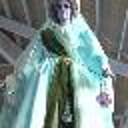

['convertible']


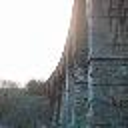

['viaduct']


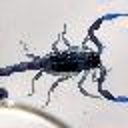

['black', 'widow,', 'Latrodectus', 'mactans']


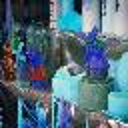

['comic', 'book']


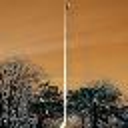

['flagpole,', 'flagstaff']


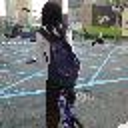

['gondola']


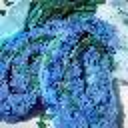

['pizza,', 'pizza', 'pie']


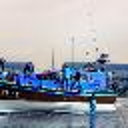

['lifeboat']


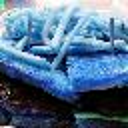

['potpie']


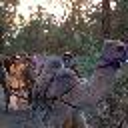

['spider', 'web,', "spider's", 'web']


In [9]:
# This shows some test set images and the model's predictions on them
display_dim = 128
for _ in range(10):
    index = np.random.randint(len(X_test))
    img = Image.fromarray(X_test[index], "RGB").resize(size=(display_dim, display_dim))
    word_label = words[results[index]]
    display(img)
    print(word_label)

In [ ]:
# This saves an HTML version of the notebook for later viewing
# NOTE: Make sure to check if the html was completely saved, sometimes it doesn't
from nbconvert import HTMLExporter
import codecs
import nbformat
exporter = HTMLExporter()
output_notebook = nbformat.read("Training.ipynb", as_version=nbformat.NO_CONVERT)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(model_prefix + ".html", "w").write(output)